## Practical 08 - Implementation of Decision Tree Algorithm on IRIS dataset
A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences, including chance events, resource costs, and utility. The tree is made up of decision nodes, which represent tests on attributes, and leaf nodes, which represent outcomes or predictions.
### Algorithm
##### Slep1: Select the Best Split
Choose the feature that best separates the data using a splitting criterion (e.g., Gini Index, Information Gain, Chi-Square, or Mean Squared Error for regression).
The goal is to split the data in a way that the resulting subsets are as pure as possible.

##### Step2:Calculate the Splitting Criteria
###### For Classification:

1)Gini Index: Measures impurity in the data. A lower value indicates a better split.

2)Information Gain: Based on entropy, it quantifies the reduction in uncertainty after the split.

###### For Regression:

1)Mean Squared Error (MSE): Used to minimize the variance in the target variable after the split.

##### Step3:Split the Data
1)Based on the chosen feature and its value, split the data into two or more subsets.

2)Each split forms a branch of the tree.
##### Step4:Repeat for Each Branch
1)For each subset (node), repeat the process of selecting the best split.

2)This step continues recursively, growing the tree deeper.
##### Step5: Stopping Criteria
The process stops when one or more of the following conditions are met:

1)Maximum Depth Reached: A predefined depth limit is reached.

2)Minimum Samples per Node: The node has fewer samples than a predefined threshold.

3)No Improvement: Further splits do not provide significant improvement.

4)Pure Nodes: All samples in a node belong to the same class (for classification).
##### Step6: Make Predictions
1)For classification, the class label is assigned based on the majority vote of the samples in the leaf node.

2)For regression, the prediction is the mean value of the target variable in the leaf node.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('dataset/iris.csv')


In [3]:
df.head()

,sepallen,sepalwid,petallen,petalwid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x = df.iloc[:, :-1]
y= df.iloc[:, -1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
dt_classifier = DecisionTreeClassifier(random_state= 42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = dt_classifier.predict(x_test)

In [8]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")

Accuracy of Decision Tree: 100.00%


In [9]:
classification = classification_report(y_test,y_pred)
print("Classification Report:\n",classification)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



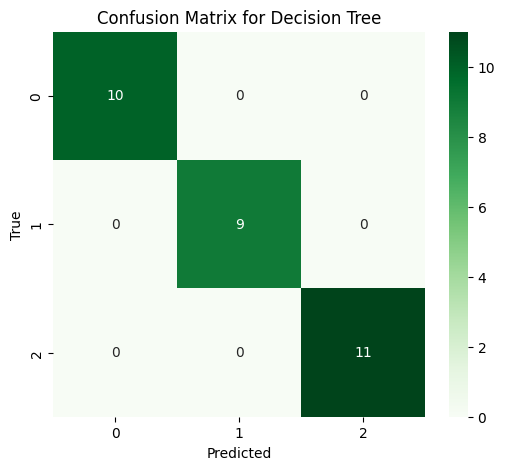

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()